## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://storage.teklia.com/shared/deepnlp-labs/stop_word_fr.txt



In [2]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE

url = 'https://storage.teklia.com/shared/deepnlp-labs/LeMonde2003_9classes.csv.gz'
df = pd.read_csv(url)
df.head()

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


In [3]:
df.shape

(30165, 2)

In [4]:
df.value_counts('category').sort_values(ascending=True)

category
UNE    2055
SPO    2608
FRA    3616
SOC    3755
ART    4552
ENT    6251
INT    7328
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

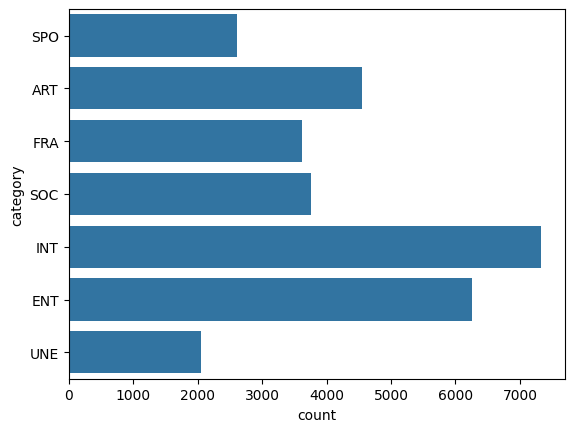

In [5]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE
sns.countplot(y='category', data=df)

In [6]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
df.sample(5)


text  \
6469                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        c'est vraiment trop jusqu'ici j'ai tenu le coup mais là je suis au bout c'est inhumain je commençais à retrouver le sommeil et voilà que ça tremble de nouveau on n'en sortira jamais ... a l'image des autres sinistrés de reghaïa salima est complètement démoralisée par les fortes secousses sismiques qui depuis mardi à intervalles irréguliers rythment la survie quotidienne des populations de l'est algérois jeudi 29 mai c'est au coeur de la nuit très précisément à 3 h 15 puis à 3 h 26 qu'à nouveau la terre a bougé la première fois l'intensité du grondement et des chocs montant des profondeurs fit songer à une explosion la deuxième on aurait dit un énorme coup de vent et puis à partir de 4 h 20 le sol fut agité d'une série de soubresauts qui se prolongèrent jusqu'à l'aube chamboulant les esprits et anéantissant les espoirs de répit dans la grande tente bleue où elle s'est réfugiée avec ses quatre enfants âgés de 5 à 13 ans salima les traits creusés les yeux rougis se débat depuis une semaine pour tenter de recréer un semblant de vie normale par-dessus des nattes en raphia elle a aligné des matelas sur lesquels les couvertures sont soigneusement pliées dans un coin une vieille valise renferme des vêtements et quelques objets personnels récupérés dans son f3 détruit ce matin l'un des fils de salima a pu se procurer des pommes de terre et grâce à une voisine qui dispose d'un petit réchaud à gaz elle prévoit de faire des frites grâce à la solidarité de tous nous ne mourons pas de faim nous avons de l'eau du lait du pain mais les sandwichs et les conserves ce n'est pas bon pour les gosses ce qu'il nous faudrait c'est une bonne chorba soupire-t-elle en remerciant le ciel de ne pas déplorer de mort parmi les siens s'il fait chaud et sec à reghaïa les camps de toile n'ont rien de villages de vacances ceux qui y ont trouvé abri s'estiment pourtant presque privilégiés malgré les 10 000 tentes installées par l'armé

In [7]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]

# print sample fo STOPWORDS
print(STOPWORDS[:10])

["s'est", 'ans', 'faire', 'avoir', 'an', "d'une", "d'un", "c'est", "qu'il", 'a']


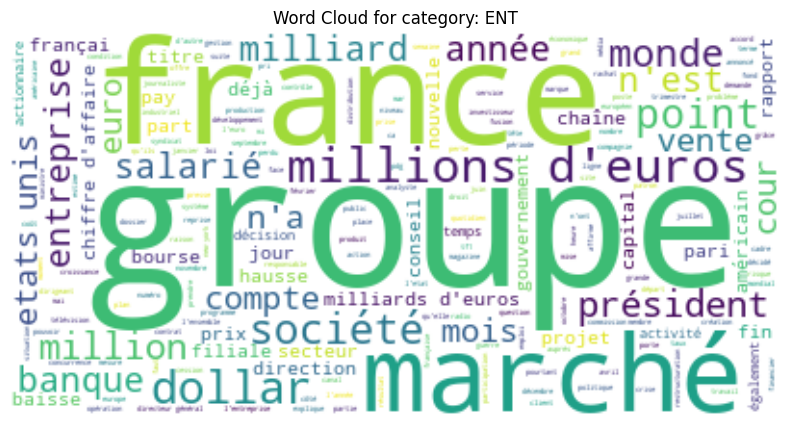

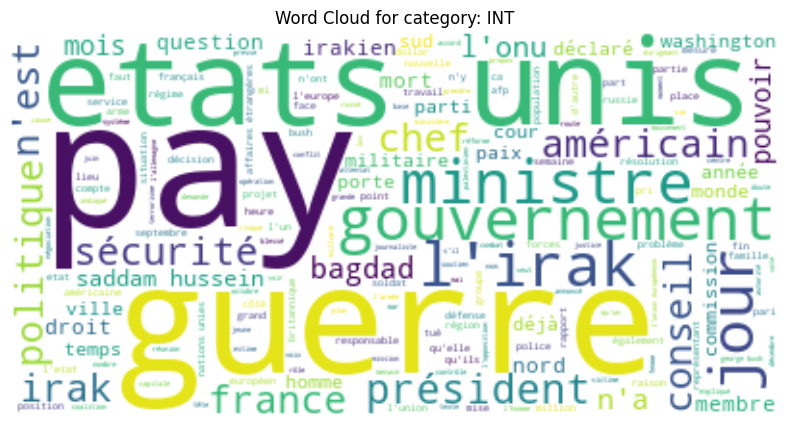

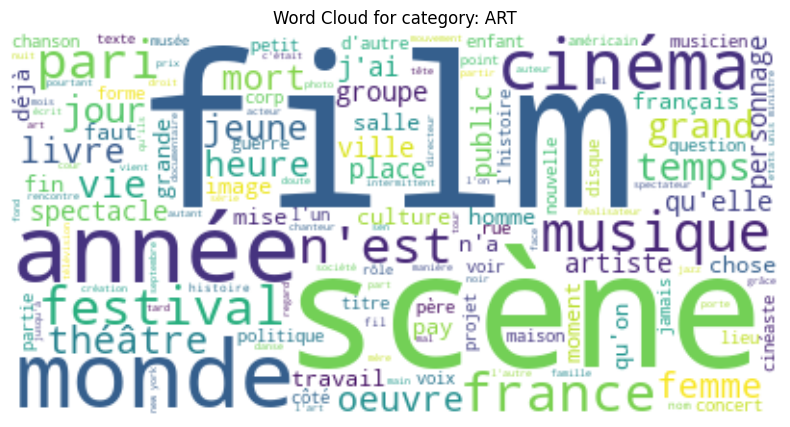

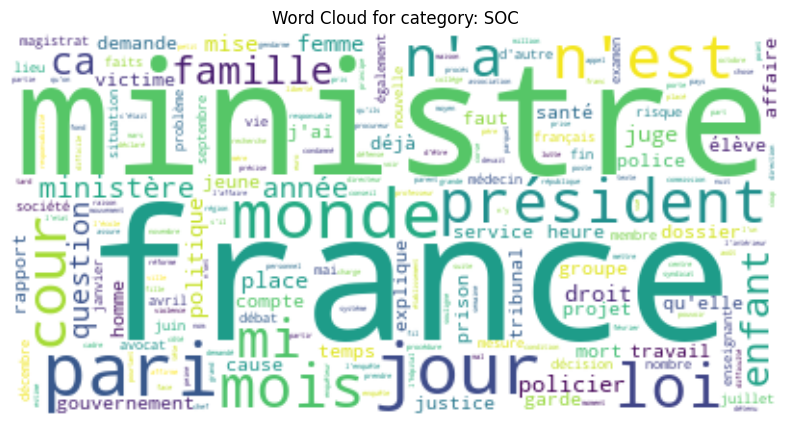

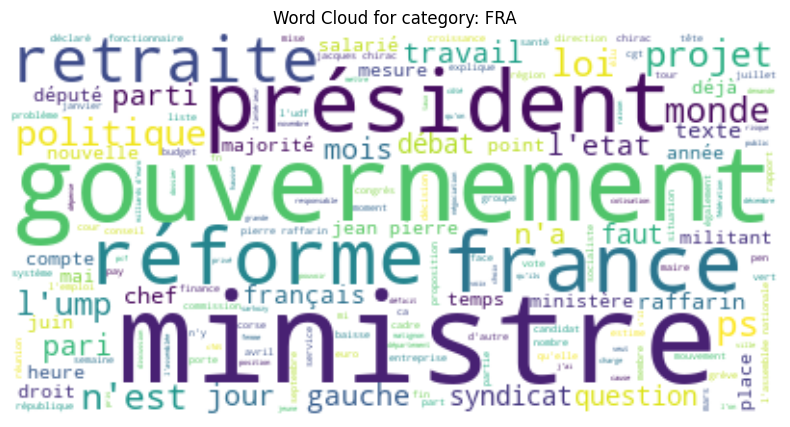

In [8]:
import matplotlib.pyplot as plt

# plot a word cloud for each category
text_col = 'text'
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
 # YOUR CODE HERE
    text = " ".join(df.loc[df['category'] == cat, text_col].astype(str))
    
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        background_color="white"
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for category: {cat}')
    plt.show()

In [9]:
# # remoce stopwords from the text column
# df['text_nostop'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in STOPWORDS]))
# df[['text', 'text_nostop']].head(2)

In [10]:
# # remove accented characters
# import unicodedata
# def remove_accents(text):
#     return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
# df['text_nostop'] = df['text_nostop'].apply(remove_accents)
# df[['text', 'text_nostop']].head(2)

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [12]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
X = df['text']
y = df['category']

# train (80%) & temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# temporary set (20%) into dev (10%) and test (10%)
X_dev, X_test, y_dev, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

X_train.shape, X_dev.shape, X_test.shape, y_train.shape, y_dev.shape, y_test.shape

((24132,), (3016,), (3017,), (24132,), (3016,), (3017,))

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE

# create the vectorizer object
vectorizer = CountVectorizer(max_features=200)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

X_train_counts.shape, X_dev_counts.shape, X_test_counts.shape

((24132, 200), (3016, 200), (3017, 200))

In [14]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE

# create the MultinomialNB
clf = MultinomialNB()

# Train
clf.fit(X_train_counts, y_train)

# Evaluate
train_acc = clf.score(X_train_counts, y_train)
dev_acc = clf.score(X_dev_counts, y_dev)
test_acc = clf.score(X_test_counts, y_test)

train_acc, dev_acc, test_acc

(0.5635256091496768, 0.5769230769230769, 0.5614849187935035)

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE

# train
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

X_train_tf.shape, X_test_tf.shape

((24132, 200), (3017, 200))

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [18]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
# YOUR CODE HERE
y_pred = clf.predict(X_test_counts)
print(classification_report(y_test, y_pred))

# From the ouput below, we see that 
# - 'INT' class have the best score for 'precsion', but low in 'recall'
# - 'ENT' have the best score for 'recall', but lower in 'precision'
# - The best one should be 'ART' as it have good score for both, and get the best score in f1-score.

              precision    recall  f1-score   support

         ART       0.68      0.66      0.67       455
         ENT       0.56      0.75      0.64       625
         FRA       0.49      0.53      0.51       362
         INT       0.72      0.56      0.63       733
         SOC       0.44      0.49      0.46       376
         SPO       0.59      0.44      0.50       261
         UNE       0.16      0.13      0.14       205

    accuracy                           0.56      3017
   macro avg       0.52      0.51      0.51      3017
weighted avg       0.57      0.56      0.56      3017



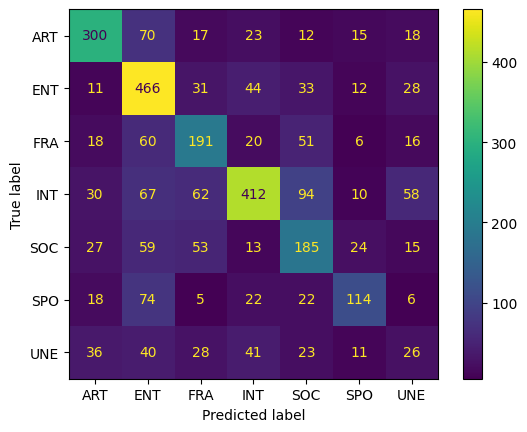

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_)
disp.plot()

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
df2 = df[df['category'] != 'UNE']

<Axes: title={'center': 'Class Distribution without UNE'}, ylabel='category'>

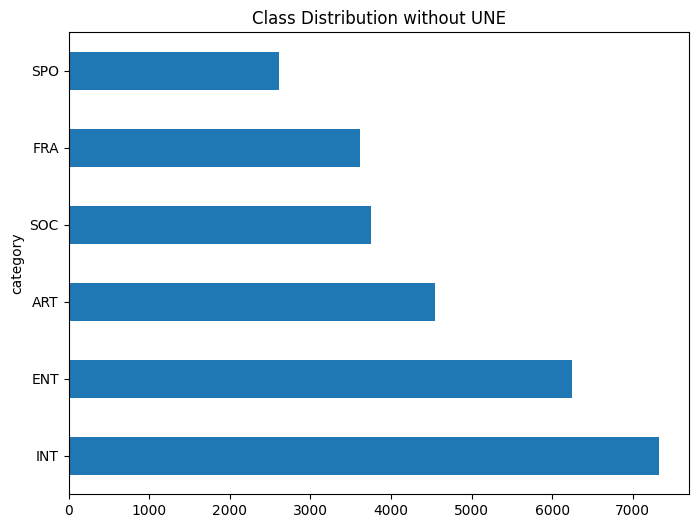

In [33]:
# Plot the statistics of classes
df2['category'].value_counts().plot(kind='barh', figsize=(8,6), title='Class Distribution without UNE')

In [34]:
# Make the splits and print the sizes for checking
X = df2['text']
y = df2['category']

# train (80%) & temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# temporary set (20%) into dev (10%) and test (10%)
X_dev, X_test, y_dev, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)
X_train.shape, X_dev.shape, X_test.shape, y_train.shape, y_dev.shape, y_test.shape

((22488,), (2811,), (2811,), (22488,), (2811,), (2811,))

In [35]:
# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=200)
vectorizer.fit(X_train)

X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [36]:
# Train MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Print accuracy
train_acc = clf.score(X_train_counts, y_train)
dev_acc = clf.score(X_dev_counts, y_dev)
test_acc = clf.score(X_test_counts, y_test)

train_acc, dev_acc, test_acc

(0.5393987904660263, 0.5304162219850587, 0.5393098541444326)

In [39]:
# Print confusion matric
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_pred = clf.predict(X_test_counts)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ART       0.63      0.66      0.65       455
         ENT       0.57      0.69      0.62       625
         FRA       0.71      0.15      0.24       362
         INT       0.47      0.89      0.62       733
         SOC       0.60      0.14      0.23       375
         SPO       0.90      0.10      0.18       261

    accuracy                           0.54      2811
   macro avg       0.65      0.44      0.42      2811
weighted avg       0.61      0.54      0.48      2811



# Classification using sentence embeddings

Word embeddings were initially developed to calculate dense vector representations of words that encode syntax and semantics. Word embedding such as BERT can be extended and trained to encode the semantic meaning of sentences or short paragraphs. These models are trained using pairs of similar, neutral or contradictory sentences using a [Siamese neural network](https://en.wikipedia.org/wiki/Siamese_neural_network). The model is optimised to minimise the distance between the embeddings of similar sentences and maximise the distance between the embeddings of contradictory sentences. Once trained, these models can be used to encode documents of variable (but bounded) length into fixed-length embeddings.


In this section, we will use sentence embeddings to encode Le Monde articles and classify them with a simple Multi-layer Perceptron classifier. The [sentence-transformers library](https://www.sbert.net/index.html) makes it easy to encode documents into embeddings: https://www.sbert.net/examples/sentence_transformer/applications/computing-embeddings/README.html
The [paraphrase-multilingual-MiniLM-L12-v2](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) model allows texts in different languages with a maximum length of 128 tokens to be encoded into a single 384-dimensional embedding vector.

Your task is to
- load the paraphrase-multilingual-MiniLM-L12-v2 model
- merge the previous train and dev (into train_dev) sets because the MLP classifier uses part of the train set for [early stopping](https://en.wikipedia.org/wiki/Early_stopping)
- encode the train_dev and test texts with the embeddings model
- encode the targets of the train_dev and test sets. This encoding is needed because the MLP classifier does not handle string labels.
- define an [MLP classifier from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) 
- train the classifier on train_dev
- evaluate the classifier on test
- compare the results with the previous classifier







In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import torch

MODEL_NAME = 'paraphrase-multilingual-MiniLM-L12-v2'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load the model
model = SentenceTransformer(MODEL_NAME)

# combine train and dev
X_combined = pd.concat([X_train, X_dev])
y_combined = pd.concat([y_train, y_dev])

# encode train_dev and test sets
X_combined_embeddings = model.encode(X_combined.tolist())
X_test_embeddings = model.encode(X_test.tolist())

# encode the targets
le = LabelEncoder()
y_combined_encoded = le.fit_transform(y_combined)
y_test_encoded = le.transform(y_test)

# define the MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# train the classifier
mlp.fit(X_combined_embeddings, y_combined_encoded)

# evaluate the classifier
test_acc = mlp.score(X_test_embeddings, y_test_encoded)
test_acc


/Users/nysarakpy/nlp-lab-text-classification/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 199/199 [00:00<00:00, 1926.78it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


0.7979366773390253

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [ ]:
import torch

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7")
model = AutoModelForSequenceClassification.from_pretrained("MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7").to(device)